<a href="https://colab.research.google.com/github/AshNicolus/MachineLearning-LAB/blob/main/binary_classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/sample_data/mnist_train_small.csv")
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


(19999, 785)

In [ ]:
from sklearn.model_selection import train_test_split
data_filtered = data[(data[data.columns[0]] == 0) | (data[data.columns[0]] == 1)]
X = data_filtered.drop(data.columns[0], axis=1)
y = data_filtered[data.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3364, 784)
Shape of X_test: (841, 784)
Shape of y_train: (3364,)
Shape of y_test: (841,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
predictions = model.predict(X_test)
print(predictions)

[1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1
 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1
 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1
 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1
 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0
 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0
 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 0 0 1 0 1 0 0 

In [ ]:
from sklearn.metrics import f1_score, precision_score,accuracy_score,confusion_matrix,recall_score
predictions = model.predict(X_test)
f1 = f1_score(y_test,predictions)
accuracy = accuracy_score(y_test,predictions)
recall = recall_score(y_test,predictions)
confusion_mat = confusion_matrix(y_test,predictions)
print("Confusion Matrix:",confusion_mat)
precision = precision_score(y_test,predictions)
print("Recall:",recall)
print("F1 Score:",f1)
print("Precision:",precision)
print("Accuracy:",accuracy)

Confusion Matrix: [[396   1]
 [  3 441]]
Recall: 0.9932432432432432
F1 Score: 0.9954853273137697
Precision: 0.997737556561086
Accuracy: 0.995243757431629


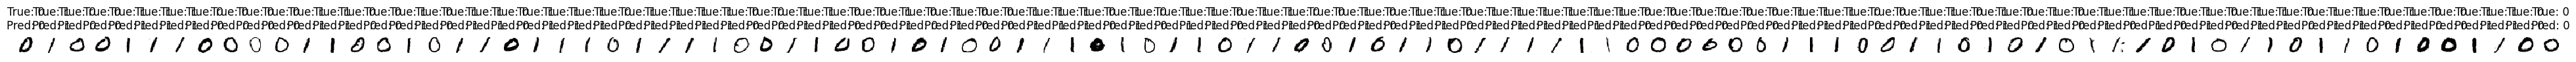

In [ ]:
import matplotlib.pyplot as plt

n_samples = 100
sample_indices = np.random.choice(len(X_test), n_samples, replace=False)

plt.figure(figsize=(50, 8))
for i, index in enumerate(sample_indices):

    image = X_test.iloc[index].values.reshape(28, 28)

    plt.subplot(1, n_samples, i + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(f"True: {y_test.iloc[index]}\nPred: {predictions[index]}")
    plt.axis("off")

plt.show()

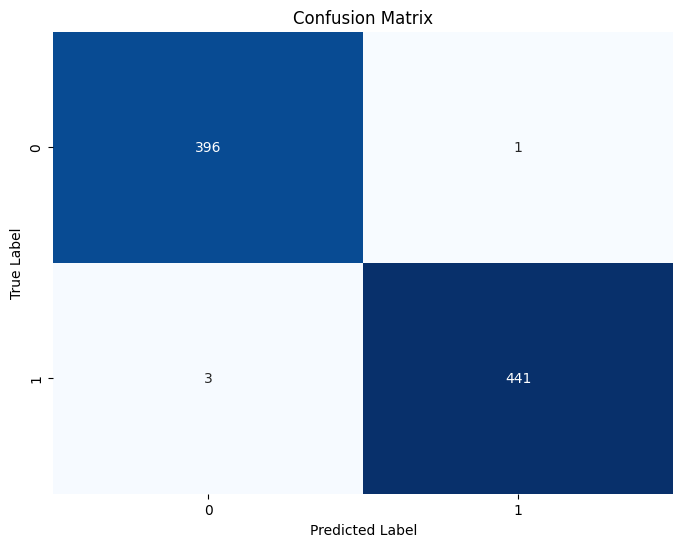

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()